# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [ ]:
# Instalación de dependencias
! pip install pandas requests lxml

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Paso 3: Descargar HTML
url = 'https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify'
response = requests.get(url)

# Verificar si la solicitud fue exitosa
response.status_code

200

In [5]:
# Paso 3: Tranforma el HTML
tablas = pd.read_html(url)

# Verificar la cantidad de tablas
print('Cantidad de tablas:', len(tablas))

# Encontrar la tabla que quiero explorar
for i, tabla in enumerate(tablas):
    print(f"\nTabla {i}")
    print(tabla.head())

Cantidad de tablas: 27

Tabla 0
  Rank                 Song                 Artist(s) Streams (billions)  \
0    1    "Blinding Lights"                The Weeknd              4.848   
1    2       "Shape of You"                Ed Sheeran              4.367   
2    3  "Someone You Loved"             Lewis Capaldi              3.909   
3    4            "Starboy"  The Weeknd and Daft Punk              3.900   
4    5          "As It Was"              Harry Styles              3.883   

        Release date Ref.  
0   29 November 2019  [2]  
1     6 January 2017  [3]  
2    8 November 2018  [4]  
3  21 September 2016  [5]  
4       1 April 2022  [6]  

Tabla 1
  Rank         Artist     Top 100            Top 10       3 billion+ streams  \
  Rank         Artist Total songs Lead Feat.   Lead Feat.               Lead   
0    1     Bruno Mars           6    5     1    NaN   NaN                NaN   
1    2     The Weeknd           5    5   NaN      2   NaN                  2   
2    2       D

In [6]:
# Acceder a la Tabla 0
df = tablas[0]
print(df.head())

  Rank                 Song                 Artist(s) Streams (billions)  \
0    1    "Blinding Lights"                The Weeknd              4.848   
1    2       "Shape of You"                Ed Sheeran              4.367   
2    3  "Someone You Loved"             Lewis Capaldi              3.909   
3    4            "Starboy"  The Weeknd and Daft Punk              3.900   
4    5          "As It Was"              Harry Styles              3.883   

        Release date Ref.  
0   29 November 2019  [2]  
1     6 January 2017  [3]  
2    8 November 2018  [4]  
3  21 September 2016  [5]  
4       1 April 2022  [6]  


In [61]:
# Paso 4: Procesa el DataFrame

# Verificar si los datos de la columna 'Streams (billions)' son numeros(float)
print(df.dtypes)

Rank                  object
Song                  object
Artist(s)             object
Streams (billions)    object
Release date          object
Ref.                  object
dtype: object


In [62]:
# Eliminar filas vacias
df = df.dropna()

# Verificar si hay valores nulos
print(df.isnull().sum())

Rank                  0
Song                  0
Artist(s)             0
Streams (billions)    0
Release date          0
Ref.                  0
dtype: int64


In [63]:
# Verificar si hay algo raro en las últimas fila
print(df.tail())
df.shape

                  Rank                Song                      Artist(s)  \
96                  97  "Someone Like You"                          Adele   
97                  98      "Stay with Me"                      Sam Smith   
98                  99            "Havana"  Camila Cabello and Young Thug   
99                 100          "Memories"                       Maroon 5   
100  As of 22 May 2025   As of 22 May 2025              As of 22 May 2025   

    Streams (billions)       Release date               Ref.  
96               2.297    24 January 2011               [98]  
97               2.297      14 April 2014               [99]  
98               2.285      3 August 2017              [100]  
99               2.265  20 September 2019              [101]  
100  As of 22 May 2025  As of 22 May 2025  As of 22 May 2025  


(101, 6)

In [ ]:
# Eliminar la última fila
df = df.iloc[:-1]

In [67]:
# Verificar si la fila fue eliminada correctamente
df.shape
print(df.tail())

   Rank                    Song                      Artist(s)  \
95   96  "Too Good at Goodbyes"                      Sam Smith   
96   97      "Someone Like You"                          Adele   
97   98          "Stay with Me"                      Sam Smith   
98   99                "Havana"  Camila Cabello and Young Thug   
99  100              "Memories"                       Maroon 5   

   Streams (billions)       Release date   Ref.  
95              2.306   8 September 2017   [97]  
96              2.297    24 January 2011   [98]  
97              2.297      14 April 2014   [99]  
98              2.285      3 August 2017  [100]  
99              2.265  20 September 2019  [101]  


In [85]:
# Paso 5: Almacena los datos en sqlite
df_sql = df.copy()
df_sql.columns = ['rank', 'song', 'artist', 'streams', 'release_date', 'ref']

# Eliminamos la columna 'ref' 
df_sql = df_sql.drop(columns='ref')

In [86]:
# Conectar a la base de datos SQLite
conn = sqlite3.connect('spotify_songs.db')
cursor = conn.cursor()

In [88]:
# Crear tabla 
cursor.execute('''
    CREATE TABLE IF NOT EXISTS songs (
        rank INTEGER,
        song TEXT,
        artist TEXT,
        streams REAL,
        release_date TEXT
    )
''')

In [89]:
# Insertar datos del DataFrame en la tabla
df_sql.to_sql('songs', conn, if_exists='replace', index=False)

# Confirmar y cerrar conexión
conn.commit()
conn.close()

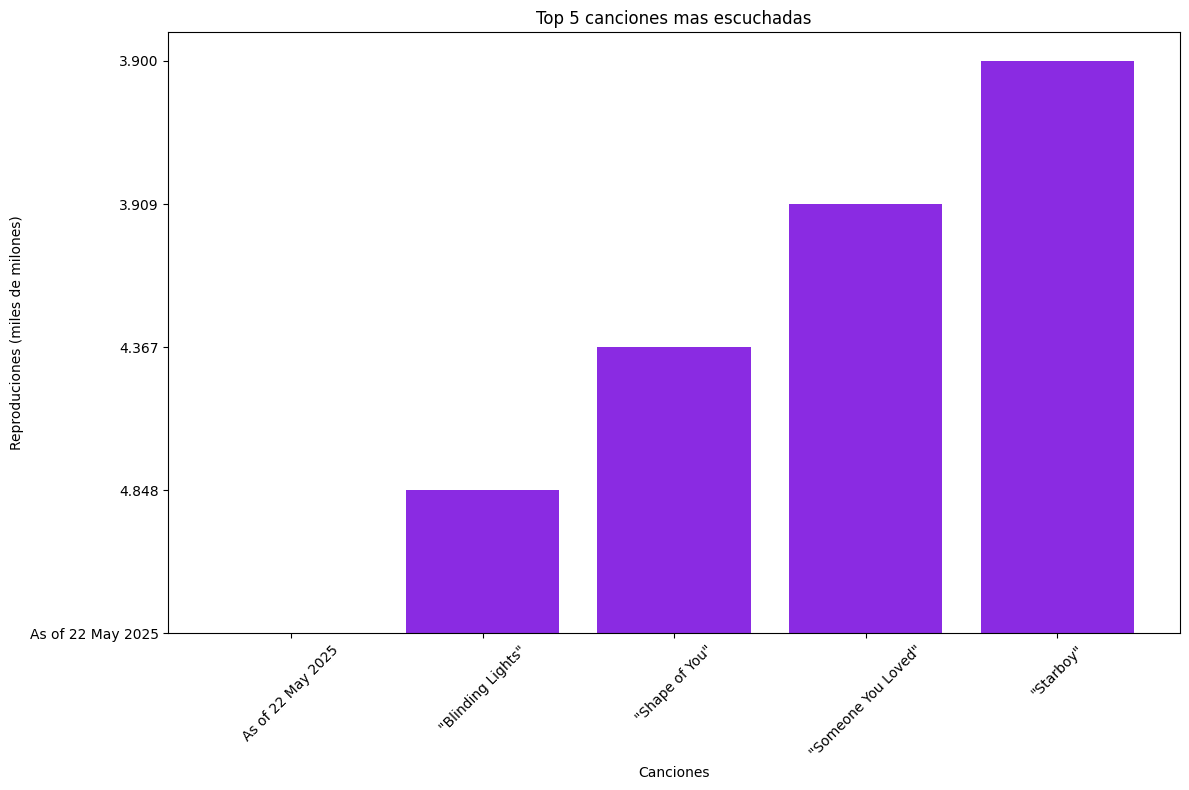

In [14]:
# Paso 6: Visualiza los datos
# Seleccionar las 5 canciones mas escuchadas
top5 = df.sort_values('Streams (billions)', ascending=False).head(5)

# Graficas los top 5
plt.figure(figsize=(12,8))
plt.bar(top5['Song'], top5['Streams (billions)'], color='blueviolet')
plt.xlabel('Canciones')
plt.ylabel('Reproduciones (miles de milones)')
plt.title('Top 5 canciones mas escuchadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_592/1468600428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


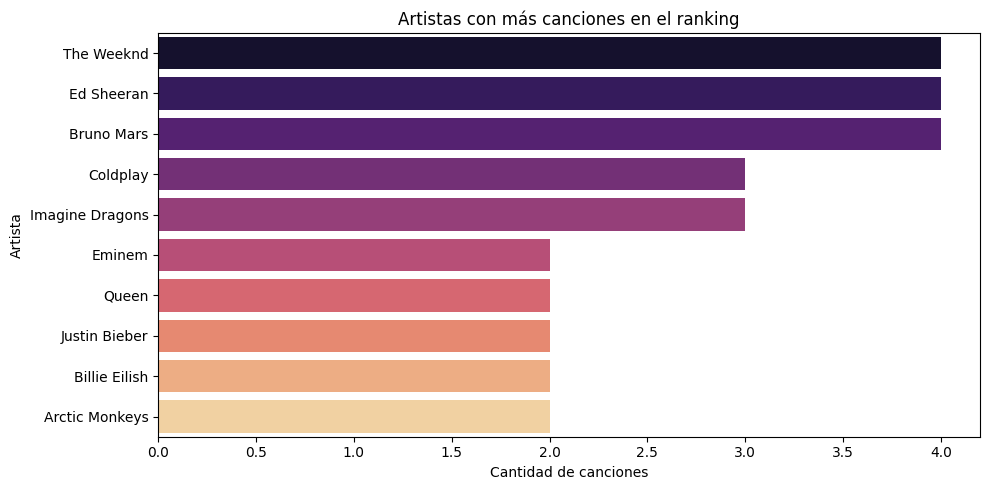

In [15]:
# Artistas que aparecen mas veces
top_artists = df['Artist(s)'].value_counts().head(10)

# Grafico con resultados
plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Artistas con más canciones en el ranking')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

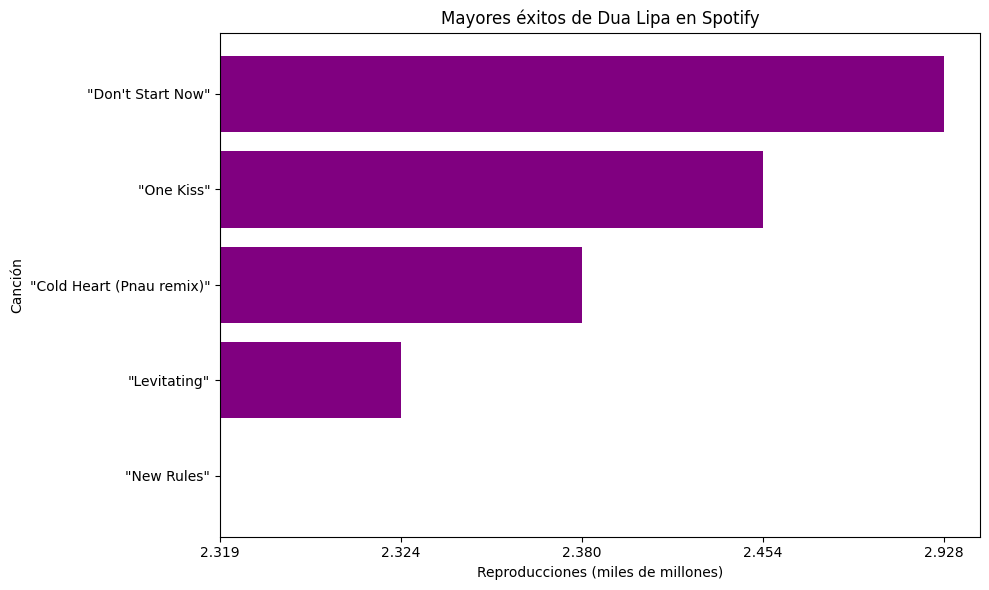

In [ ]:
# Filtrar canciones de Dua Lipa para saber sua mayores exitos
dua_lipa_songs = df[df['Artist(s)'].str.contains('Dua Lipa')]

# Ordenar por streams  
dua_lipa_songs = dua_lipa_songs.sort_values('Streams (billions)')

# Grafico 
plt.figure(figsize=(10,6))
plt.barh(dua_lipa_songs['Song'], dua_lipa_songs['Streams (billions)'], color='purple')
plt.title('Mayores éxitos de Dua Lipa en Spotify')
plt.xlabel('Reproducciones (miles de millones)')
plt.ylabel('Canción')
plt.tight_layout()
plt.show()